<h4>This project is created to analyze the effectiveness of two marketing campaigns</h4>


<h4>Below are all the features in the dataset:</h4>

Campaign Name: The name of the campaign

Date: Date of the record

Spend: Amount spent on the campaign in dollars

of Impressions: Number of impressions the ad crossed through the campaign

Reach: The number of unique impressions received in the ad

of Website Clicks: Number of website clicks received through the ads

of Searches: Number of users who performed searches on the website

of View Content: Number of users who viewed content and products on the website

of Add to Cart: Number of users who added products to the cart

of Purchase: Number of purchases

<h3> Cleaning and vizualization </h3>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

In [4]:
control = pd.read_csv('control_group.csv', sep=';')
test = pd.read_csv('test_group.csv', sep=';')

In [5]:
control = control.dropna()
test = test.dropna()

control.columns = control.columns.str.replace('# of', '')
control.columns = control.columns.str.replace(' [USD]', '')
control.columns = control.columns.str.replace(' ', '')

test.columns = test.columns.str.replace('# of', '')
test.columns = test.columns.str.replace(' [USD]', '')
test.columns = test.columns.str.replace(' ', '')

control.head()

,CampaignName,Date,Spend,Impressions,Reach,WebsiteClicks,Searches,ViewContent,AddtoCart,Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
5,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0


In [6]:
control.describe()

,Spend,Impressions,Reach,WebsiteClicks,Searches,ViewContent,AddtoCart,Purchase
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2304.068966,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.000000,522.793103
std,363.534822,21688.922908,21832.349595,1757.369003,866.089368,777.545469,407.457973,185.028642
min,1757.000000,71274.000000,42859.000000,2277.000000,1001.000000,848.000000,442.000000,222.000000
25%,1962.000000,92029.000000,74192.000000,4085.000000,1615.000000,1249.000000,930.000000,372.000000
50%,2319.000000,113430.000000,91579.000000,5224.000000,2390.000000,1984.000000,1339.000000,501.000000
75%,2544.000000,121332.000000,102479.000000,6628.000000,2711.000000,2421.000000,1641.000000,670.000000
max,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000


In [7]:
test.describe()

,Spend,Impressions,Reach,WebsiteClicks,Searches,ViewContent,AddtoCart,Purchase
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2563.066667,74584.800000,53491.566667,6032.333333,2418.966667,1858.000000,881.533333,521.233333
std,348.687681,32121.377422,28795.775752,1708.567263,388.742312,597.654669,347.584248,211.047745
min,1968.000000,22521.000000,10598.000000,3038.000000,1854.000000,858.000000,278.000000,238.000000
25%,2324.500000,47541.250000,31516.250000,4407.000000,2043.000000,1320.000000,582.500000,298.000000
50%,2584.000000,68853.500000,44219.500000,6242.500000,2395.500000,1881.000000,974.000000,500.000000
75%,2836.250000,99500.000000,78778.750000,7604.750000,2801.250000,2412.000000,1148.500000,701.000000
max,3112.000000,133771.000000,109834.000000,8264.000000,2978.000000,2801.000000,1391.000000,890.000000


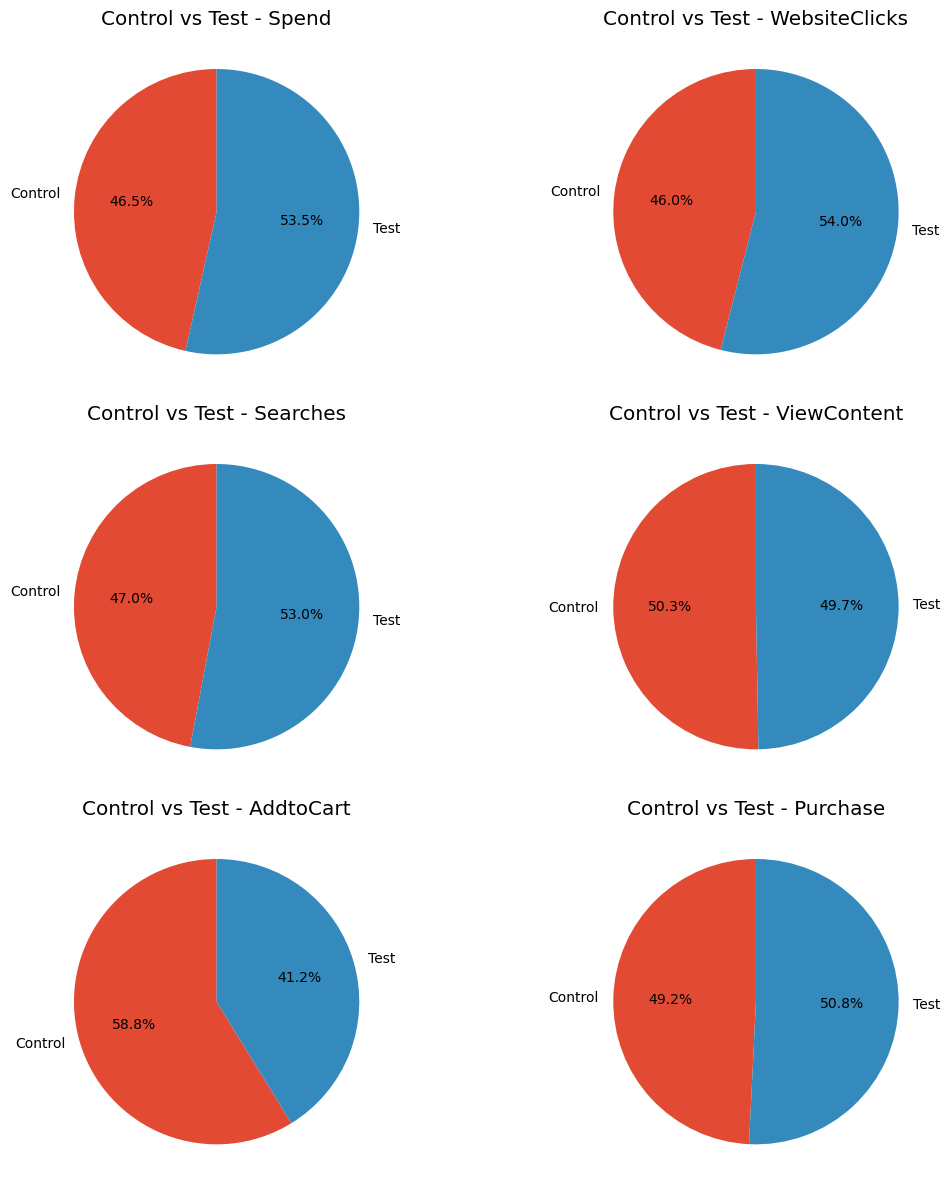

In [8]:
metrics = ['Spend', 'WebsiteClicks', 'Searches', 'ViewContent', 'AddtoCart', 'Purchase']

fig, axs = plt.subplots(3, 2, figsize=(12, 12))
axs = axs.flatten()

for i, metric in enumerate(metrics):
    axs[i].pie([control[metric].sum(), test[metric].sum()], labels=['Control', 'Test'], autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Control vs Test - {metric}')

plt.tight_layout()
plt.show()

<h2> Start of A/B test</h2>
<h4> Key metric: Purchase</h4>

Let's add Conversion, CPC and ROI metrics

In [10]:
control['Conversion'] = control['Purchase'] / control['WebsiteClicks']
test['Conversion'] = test['Purchase'] / test['WebsiteClicks']

control['CPC'] = control['Spend'] / control['WebsiteClicks']
test['CPC'] = test['Spend'] / test['WebsiteClicks']

control['ROI'] = ((control['Purchase'] - control['Spend']) / control['Spend']) * 100
test['ROI'] = ((test['Purchase'] - test['Spend']) / test['Spend']) * 100

metrics = ['Purchase', 'AddtoCart', 'ViewContent', 'Conversion', 'CPC', 'ROI']

In [11]:
from scipy.stats import shapiro
alpha = 0.05

norm_metrics = []
not_norm_metrics = []

for metric in metrics:
    _, c_pval = shapiro(control[metric])
    _, t_pval = shapiro(test[metric])
    print(f'{metric}: control p-value = {c_pval}, test p-value = {t_pval}')
    if c_pval > alpha and t_pval > alpha:
        print("Normal destribution\n")
        norm_metrics.append(metric)
    else:
        print("NOT Normal destribution\n")
        not_norm_metrics.append(metric)

Purchase: control p-value = 0.08964364230632782, test p-value = 0.024077769368886948
NOT Normal destribution

AddtoCart: control p-value = 0.25248831510543823, test p-value = 0.03319269046187401
NOT Normal destribution

ViewContent: control p-value = 0.06875582039356232, test p-value = 0.09282878786325455
Normal destribution

Conversion: control p-value = 0.007293718867003918, test p-value = 0.037268370389938354
NOT Normal destribution

CPC: control p-value = 0.0028297684621065855, test p-value = 0.01618819124996662
NOT Normal destribution

ROI: control p-value = 0.2041274905204773, test p-value = 0.1602039933204651
Normal destribution



For not normal destributed metrics we will use Mann-Whitney U Test

In [13]:
from scipy.stats import mannwhitneyu

for metric in not_norm_metrics:
    _, pval = mannwhitneyu(control[metric], test[metric])
    if pval > alpha:
        print(f'{metric} p-value = {pval}')
        print(f'There is no significant difference in {metric} between groups\n')
    else:
        print(f'{metric} p-value = {pval}')
        print(f'There is significant difference in {metric} between groups\n')

Purchase p-value = 0.957674926453464
There is no significant difference in Purchase between groups

AddtoCart p-value = 0.0005312022228449564
There is significant difference in AddtoCart between groups

Conversion p-value = 0.30610346625699913
There is no significant difference in Conversion between groups

CPC p-value = 0.8259891984722325
There is no significant difference in CPC between groups



For normal destributed metrics we will use Welch's T-test

In [30]:
from scipy.stats import ttest_ind

for metric in norm_metrics:
    _, pval = ttest_ind(control[metric], test[metric], equal_var=False)
    if pval > alpha:
        print(f'{metric} p-value = {pval}')
        print(f'There is no significant difference in {metric} between groups\n')
    else:
        print(f'{metric} p-value = {pval}')
        print(f'There is significant difference in {metric} between groups\n')

ViewContent p-value = 0.6374298992135601
There is no significant difference in ViewContent between groups

ROI p-value = 0.28012954703854503
There is no significant difference in ROI between groups



<h3> Conclusion </h3>

The analysis of the campaign metrics reveals a mixed outcome.
But the most metrics (uncluding key one) shows that test campaign isn't more effective in attracting user clicks